# Exploratory Data Analysis (EDA) on Airbnb Dataset

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation and Cleaning

In [2]:
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
airbnb_df.shape

(48895, 16)

In [9]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [16]:
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Dropping 'host_name' and 'last_review' columns because they are irrelevant

In [18]:
airbnb_df.drop(['host_name', 'last_review'], axis=1, inplace = True)

In [19]:
airbnb_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Reviews per month column had a lot of missing rows but is important for analysis,hence missing values will be replaced with the mean of that column.

In [20]:
airbnb_df['reviews_per_month'].fillna(airbnb_df['reviews_per_month'].mean(),inplace=True)

In [21]:
airbnb_df.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

# Exploratory Data Analysis

## Correlation

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_6508\352729418.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_1 = airbnb_df.corr()


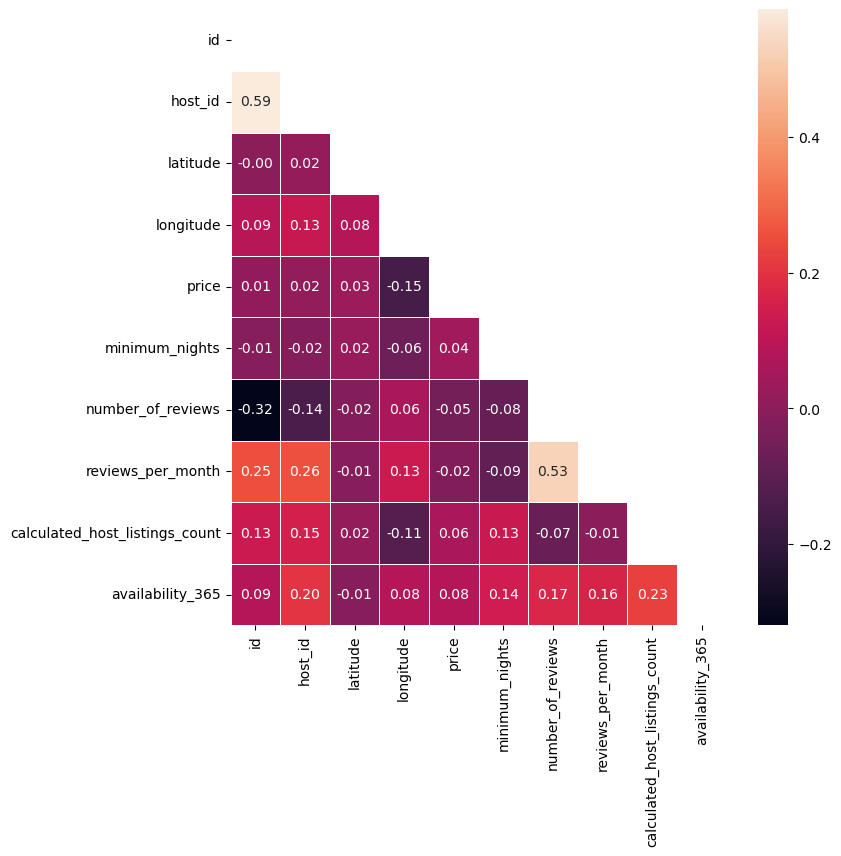

In [22]:
corr_1 = airbnb_df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

### Correlation heatmap shows a high correlation between number of reviews and reviews per month.

## Relation between neighbourhood group and availability

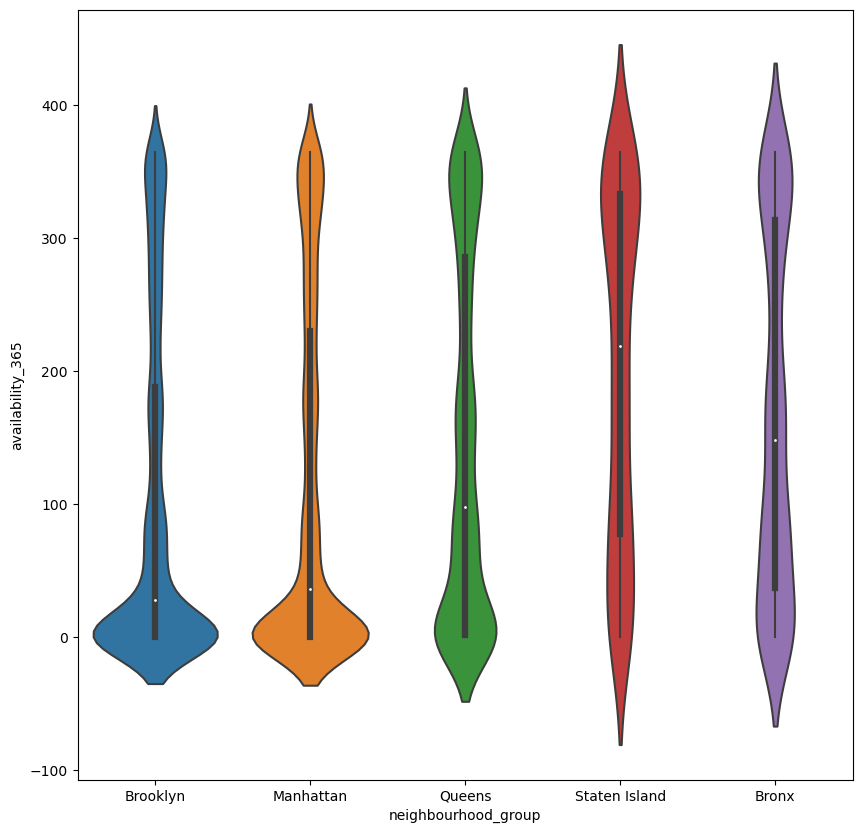

In [23]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=airbnb_df, x="neighbourhood_group", y="availability_365")

### Violin Plot shows that Staten Island has the highest mean availability value compared to others

## Relation between neighbourhood group and price

<Axes: xlabel='neighbourhood_group', ylabel='price'>

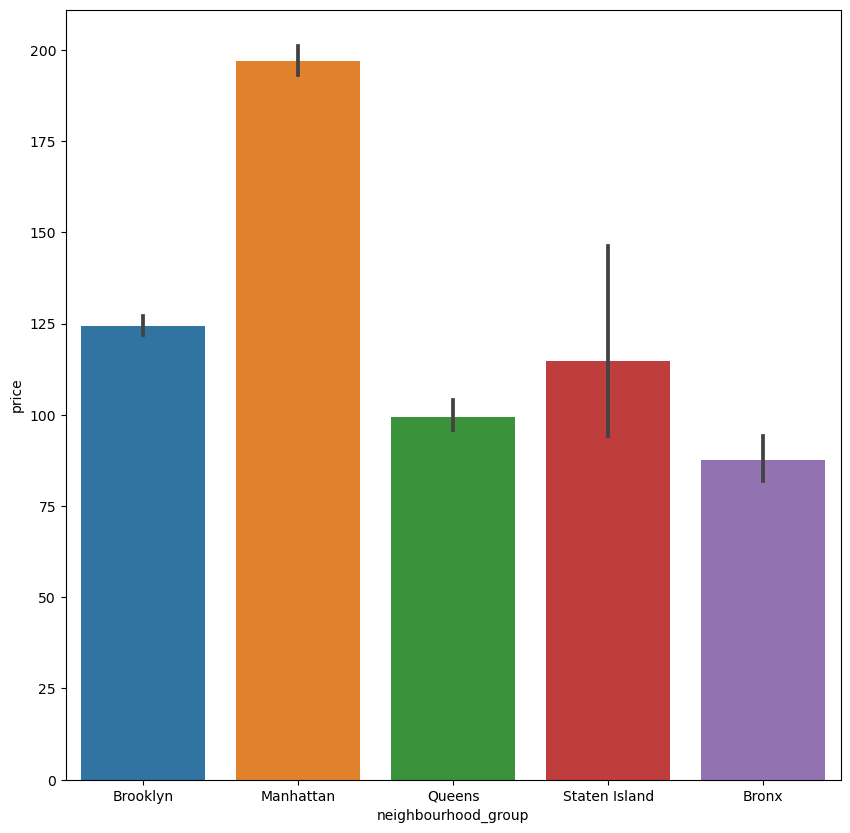

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(data=airbnb_df, x='neighbourhood_group', y='price')

### Bar plot plotted between neighbourhood group and price shows that Manhattan has the most expensive prices.

## Since we have latitude and longitude of each listing, let's plot it using a scatterplot

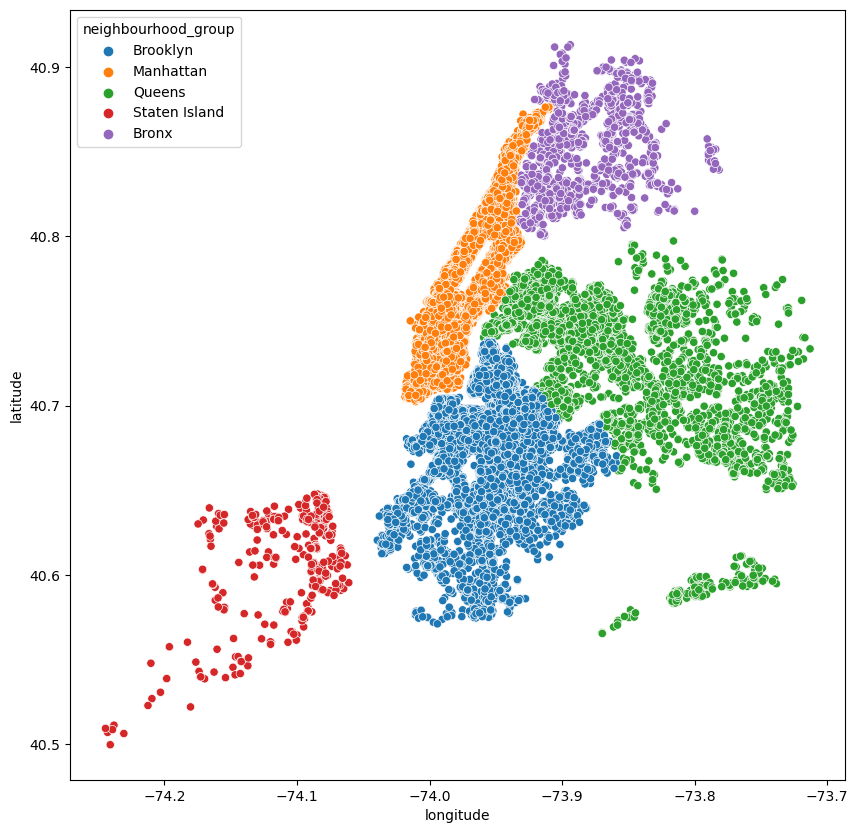

In [31]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=airbnb_df.longitude, y=airbnb_df.latitude, hue=airbnb_df.neighbourhood_group)
plt.ioff()
plt.show()

### From the points on the map we can see that there is more density in the Brooklyn and Manhattan.

## Now let's categorise rooms based on price Let price less than 75 dollars be low,between 75 and 500 dollars be medium and above 500 dollars be high

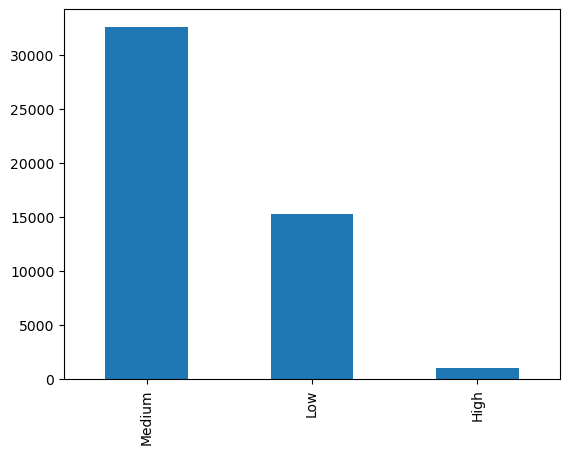

In [34]:
def categorise(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'
airbnb_df['price'].apply(categorise).value_counts().plot(kind='bar');
plt.show()

### Most of the rooms fall in the Medium (75-500 dollars) category followed by Low and High range rooms.

## Lets analyse the names of the listings.

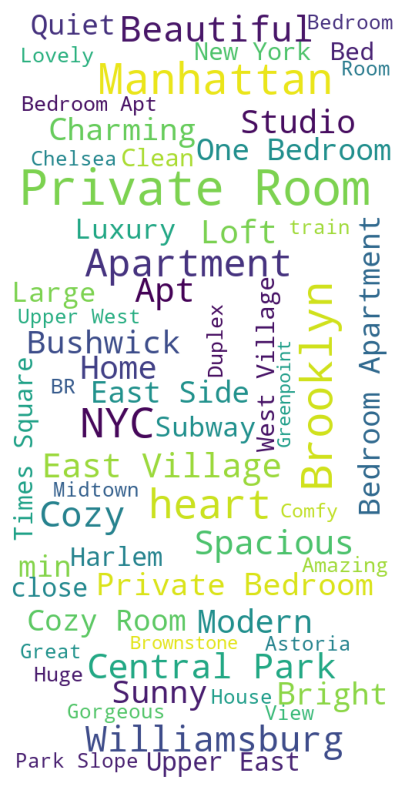

In [40]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
name1 = " ".join(str(w) for w in airbnb_df.name)
plt.subplots(figsize=(25,10))
wordcloud = WordCloud(background_color='white', height=1000, width=500, max_words=60).generate(name1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Our word cloud shows the words that are more often used in the Name of this listings.We can see most of the words are related to the description,place and the experience in the room.

## Now let's analyse the number of reviews

<Figure size 800x800 with 0 Axes>

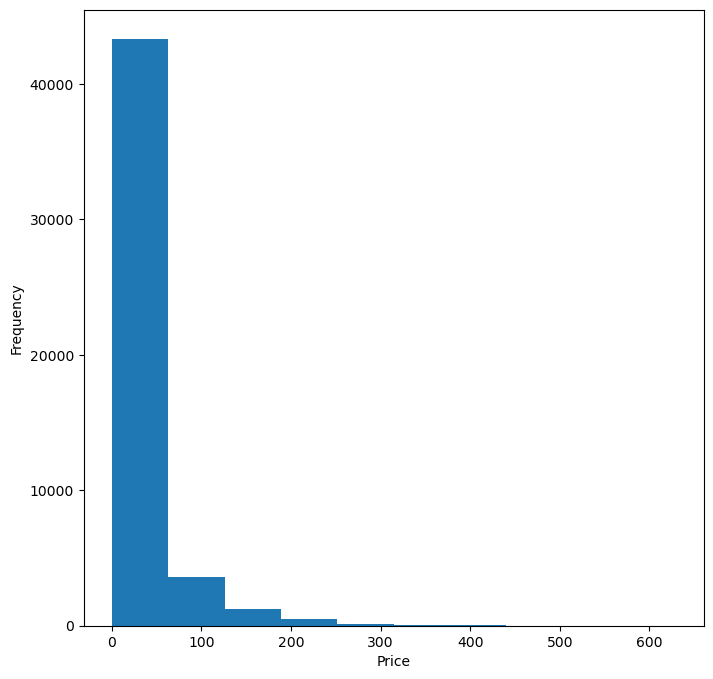

In [42]:
plt.figure(figsize=(8,8))
airbnb_df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

### From the histogram we can see that low cost rooms or in range (0-50 dollars) have more reviews.